# Forutsi Boligpriser med Regresjon

---

Her skal vi jobbe med å evaluere boligprisen gitt følgende spesifikasjoner:

1. Salgsår for huset
2. Husets alder på salgstidspunktet
3. Avstand fra sentrum
4. Antall butikker i området
5. Breddegrad
6. Lengdegrad

## Importere pakker og hjelpefunksjoner

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
#tf.logging.set_verbosity(tf.logging.ERROR)

print('Libraries imported.')

Libraries imported.


## Importere Data

In [5]:
df = pd.read_csv('data.csv', names = column_names) 
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


## Data Normalisering

In [6]:
df = df.iloc[:,1:] # Ignoring the first column
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## Konvertere Labelverdi 

In [7]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

print(convert_label_value(0.350088))

14263


### Trenings- og Testsettene

## Velge egenskapene 

Sørge for å fjerne kolonnen __price__ fra listen over egenskapene, ettersom den er etiketten og ikke skal brukes som en egenskap.

In [8]:
X = df_norm.iloc[:, :6]
X.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


## Ettiketter

In [9]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## Egenskap og Etikketteverdier

Vi trenger å trekke ut kun de numeriske verdiene for egenskapene og etikettene, da TensorFlow-modellen vil bare forvente kun numeriske verdier som input

In [10]:
X_arr = X.values
Y_arr = Y.values

# print('features array shape:', a_arr.shape)
# print('labels array shape:', y_arr.shape)

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (5000, 6)
Y_arr shape:  (5000,)


## Train og Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.05, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)


X_train shape:  (4750, 6)
y_train shape:  (4750,)
X_test shape:  (250, 6)
y_test shape:  (250,)


## Modellen

In [12]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


## Modelltrening

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

model = get_model()

preds_on_untrained = model.predict(X_test)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000,
    callbacks = [early_stopping]
)
# validation loss is calculating on the test set

Epoch 1/1000
149/149 [==============================] - 0s 2ms/step - loss: 1.6568 - val_loss: 1.2987
Epoch 2/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.6492 - val_loss: 1.2929
Epoch 3/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.6416 - val_loss: 1.2870
Epoch 4/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.6338 - val_loss: 1.2811
Epoch 5/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.6260 - val_loss: 1.2751
Epoch 6/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.6181 - val_loss: 1.2692
Epoch 7/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.6102 - val_loss: 1.2633
Epoch 8/1000
149/149 [==============================] - 0s 2ms/step - loss: 1.6023 - val_loss: 1.2573
Epoch 9/1000
149/149 [==============================] - 0s 2ms/step - loss: 1.5944 - val_loss: 1.2513
Epoch 10/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.586

149/149 [==============================] - 0s 1ms/step - loss: 0.9909 - val_loss: 0.8189
Epoch 160/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9892 - val_loss: 0.8177
Epoch 161/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9876 - val_loss: 0.8165
Epoch 162/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9859 - val_loss: 0.8153
Epoch 163/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9843 - val_loss: 0.8140
Epoch 164/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9827 - val_loss: 0.8128
Epoch 165/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9810 - val_loss: 0.8115
Epoch 166/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9794 - val_loss: 0.8103
Epoch 167/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9777 - val_loss: 0.8091
Epoch 168/1000
149/149 [==============================] - 0s 2ms/step - loss: 0

Epoch 238/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.8796 - val_loss: 0.7302
Epoch 239/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.8784 - val_loss: 0.7291
Epoch 240/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.8771 - val_loss: 0.7280
Epoch 241/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.8759 - val_loss: 0.7269
Epoch 242/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.8746 - val_loss: 0.7259
Epoch 243/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.8733 - val_loss: 0.7248
Epoch 244/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.8721 - val_loss: 0.7237
Epoch 245/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.8708 - val_loss: 0.7226
Epoch 246/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.8695 - val_loss: 0.7215
Epoch 247/1000
149/149 [==============================] - 0s 2ms

Epoch 317/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.7794 - val_loss: 0.6451
Epoch 318/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.7781 - val_loss: 0.6441
Epoch 319/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.7768 - val_loss: 0.6430
Epoch 320/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.7755 - val_loss: 0.6419
Epoch 321/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.7743 - val_loss: 0.6408
Epoch 322/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.7730 - val_loss: 0.6397
Epoch 323/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.7717 - val_loss: 0.6386
Epoch 324/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.7704 - val_loss: 0.6375
Epoch 325/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.7691 - val_loss: 0.6365
Epoch 326/1000
149/149 [==============================] - 0s 1ms

Epoch 396/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.6765 - val_loss: 0.5579
Epoch 397/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.6751 - val_loss: 0.5568
Epoch 398/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.6738 - val_loss: 0.5556
Epoch 399/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.6725 - val_loss: 0.5545
Epoch 400/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.6712 - val_loss: 0.5533
Epoch 401/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.6698 - val_loss: 0.5521
Epoch 402/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.6685 - val_loss: 0.5510
Epoch 403/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.6671 - val_loss: 0.5498
Epoch 404/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.6658 - val_loss: 0.5486
Epoch 405/1000
149/149 [==============================] - 0s 1ms

Epoch 475/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.5702 - val_loss: 0.4677
Epoch 476/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.5689 - val_loss: 0.4667
Epoch 477/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.5675 - val_loss: 0.4656
Epoch 478/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.5662 - val_loss: 0.4645
Epoch 479/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.5649 - val_loss: 0.4634
Epoch 480/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.5635 - val_loss: 0.4624
Epoch 481/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.5622 - val_loss: 0.4613
Epoch 482/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.5609 - val_loss: 0.4602
Epoch 483/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.5595 - val_loss: 0.4591
Epoch 484/1000
149/149 [==============================] - 0s 1ms

Epoch 554/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4706 - val_loss: 0.3875
Epoch 555/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4694 - val_loss: 0.3865
Epoch 556/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4682 - val_loss: 0.3856
Epoch 557/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4670 - val_loss: 0.3847
Epoch 558/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.4658 - val_loss: 0.3837
Epoch 559/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4646 - val_loss: 0.3828
Epoch 560/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4635 - val_loss: 0.3819
Epoch 561/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4623 - val_loss: 0.3809
Epoch 562/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4611 - val_loss: 0.3800
Epoch 563/1000
149/149 [==============================] - 0s 1ms

Epoch 633/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3867 - val_loss: 0.3231
Epoch 634/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3858 - val_loss: 0.3224
Epoch 635/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3849 - val_loss: 0.3217
Epoch 636/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3839 - val_loss: 0.3210
Epoch 637/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3830 - val_loss: 0.3203
Epoch 638/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3821 - val_loss: 0.3197
Epoch 639/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3812 - val_loss: 0.3190
Epoch 640/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3803 - val_loss: 0.3183
Epoch 641/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3794 - val_loss: 0.3176
Epoch 642/1000
149/149 [==============================] - 0s 2ms

Epoch 712/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3228 - val_loss: 0.2757
Epoch 713/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3221 - val_loss: 0.2752
Epoch 714/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3214 - val_loss: 0.2747
Epoch 715/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3207 - val_loss: 0.2742
Epoch 716/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3200 - val_loss: 0.2737
Epoch 717/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3193 - val_loss: 0.2732
Epoch 718/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3187 - val_loss: 0.2727
Epoch 719/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3180 - val_loss: 0.2723
Epoch 720/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3173 - val_loss: 0.2718
Epoch 721/1000
149/149 [==============================] - 0s 1ms

Epoch 791/1000
149/149 [==============================] - 0s 983us/step - loss: 0.2779 - val_loss: 0.2442
Epoch 792/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2775 - val_loss: 0.2439
Epoch 793/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2770 - val_loss: 0.2435
Epoch 794/1000
149/149 [==============================] - 0s 998us/step - loss: 0.2766 - val_loss: 0.2432
Epoch 795/1000
149/149 [==============================] - 0s 982us/step - loss: 0.2761 - val_loss: 0.2429
Epoch 796/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2757 - val_loss: 0.2426
Epoch 797/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2752 - val_loss: 0.2423
Epoch 798/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2748 - val_loss: 0.2420
Epoch 799/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2743 - val_loss: 0.2417
Epoch 800/1000
149/149 [==============================] - 

149/149 [==============================] - 0s 1ms/step - loss: 0.2310 - val_loss: 0.2124
Epoch 948/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2308 - val_loss: 0.2123
Epoch 949/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2306 - val_loss: 0.2122
Epoch 950/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2304 - val_loss: 0.2120
Epoch 951/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2302 - val_loss: 0.2119
Epoch 952/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2300 - val_loss: 0.2118
Epoch 953/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2298 - val_loss: 0.2116
Epoch 954/1000
149/149 [==============================] - 0s 976us/step - loss: 0.2296 - val_loss: 0.2115
Epoch 955/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.2295 - val_loss: 0.2114
Epoch 956/1000
149/149 [==============================] - 0s 1ms/step - loss:

## Plot Training & Validation Loss

Let's use the `plot_loss` helper function to take a look training and validation loss.

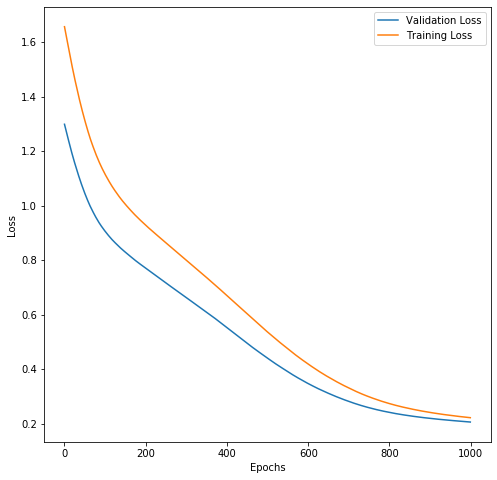

In [14]:
plot_loss(history)

## Plot-Prediksjoner

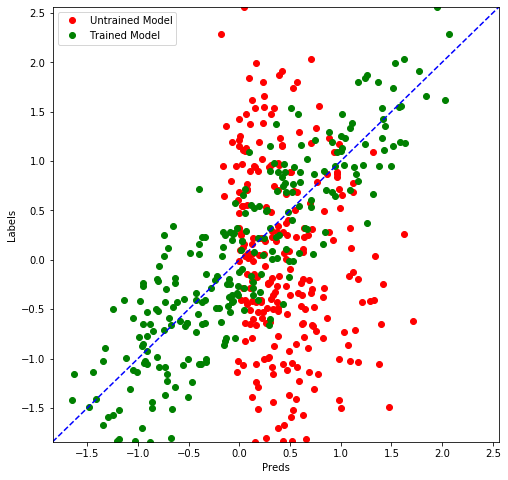

In [17]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

## 7.2: Plot-Pris-Prediksjoner

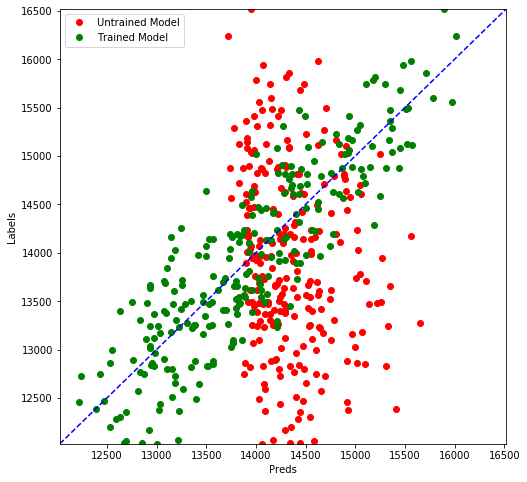

In [16]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_on_untrained, price_on_trained, price_y_test)